# Capstone Assignment: Comparing Recommendation Systems

**Overview**: In this Capstone Assignment, my goal is to compare the performance of various recommendation systems, namely Content-Based Filtering, Collaborative Filtering, and Hybrid Recommendation Systems. I will utilize datasets related to book ratings. 



### Getting Started

The datasets are from the Goodreads Book Grapgh Datasets. The ratings.csv dataset consists of ratings given to various books by Goodreads users. The books.csv dataset provides information about each book that is rated including the title, original publication year, ISBN, average rating, and more. These datasets can be found [here](https://cseweb.ucsd.edu/~jmcauley/datasets/goodreads.html#datasets) Goodreads has asked for the following citations to be provided upon use:
- Mengting Wan, Julian McAuley, "Item Recommendation on Monotonic Behavior Chains", in RecSys'18. [bibtex]
- Mengting Wan, Rishabh Misra, Ndapa Nakashole, Julian McAuley, "Fine-Grained Spoiler Detection from Large-Scale Review Corpora", in ACL'19. [bibtex]

It should be noted that the original datasets from the Goodreads website provided above were too large to load onto my computer. Therefore, I am using modified versions of the datasets from the GitHub user zygmuntz through their goodbooks-10k repository which can be found [here](https://github.com/zygmuntz/goodbooks-10k). The ratings.csv and books.csv datasets are what I will use. It should be noted that the modifications to the datasets are necessary for modeling. To be specific, the original ratings dataset consisted of Goodreads-specific user and book IDs. The modified ratings dataset gives a more uniform identification to the books and users. These identification numbers were provided by Goodreads with the purpose of being combined and added to the ratings dataset.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the Goodreads link above, and examine the **Overview** section of the page.

All the data was collected in late 2017 from goodreads.com. Three groups of datasets were collected. These datasets include meta-data of the books, user-book interactions, and users' detailed book reviews. All three datasets can be joined on book, user, and review IDs. 

The ratings.csv dataset provides the ratings given to multiple different books from multiple different users. Each book has been reviewed by multiple users and each user has reviewed multiple books. In total, there are 3 columns (user_id, book_id, and rating) and 100,000 rows. The books.csv dataset provides information on each book that has been reviewed. 10,000 books have been reviewed. 

### Problem 2: Read in the Data

Use pandas to read in the datasets `ratings.csv` and `books.csv`and assign to a meaningful variable name.

In [40]:
# Import the appropriate libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

In [41]:
# Load the data

ratings = pd.read_csv('data/ratings.csv')
books = pd.read_csv('data/books.csv')


In [42]:
# Sample the first 5 rows of the full dataset

ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [43]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### Problem 3: Understanding the Features Through Data Cleaning


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# Goodreads Book Graph Data:
1 - User-ID : Gives anonymity to each Goodreads user. With the User-ID one can search through the user_id_map.csv dataset to find the users' Goodreads user_id. (numeric)
2 - Book-ID : Allows each book to be identifiable while also keeping the data numeric and simple for modeling. With the Book-ID one can search through the book_id_map.csv dataset to find the books' Goodreads user_id. One can also search the books.csv for the specific title of the book and information about it. (numeric)
Output variable (desired target):
21 - Rating - How much does the member like the book? (numeric: 1-5 with 5 being the highest appreciation)
```



There are no missing values or duplicate columns in the ratings.csv dataset. The books.csv dataset did have missing values but no duplicate values. The missing values/rows in the books.csv dataset have been dropped and the index has been reset.

In [44]:
# Check/count the missing data in the rtaings dataset

missing_rates = ratings.isnull().sum()
missing_rates

user_id    0
book_id    0
rating     0
dtype: int64

In [45]:
# Check/count the missing data in the books dataset

missing_books = books.isnull().sum()
missing_books

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [46]:
# Drop missing data in the books dataset

books_cleaned = books.dropna()
books_cleaned

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15613,15613,2764239,199,1416523723,9.781417e+12,Herman Melville,1924.0,"Billy Budd, Sailor",...,10866,12110,681,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...


In [47]:
# Check for duplicate data in the rtaings dataset

duplicates_rates = ratings.duplicated().sum()
duplicates_rates

0

In [48]:
# Check for duplicate data in the books dataset

duplicates_books = books_cleaned.duplicated().sum()
duplicates_books

0

In [49]:
books_n = books_cleaned.reset_index(drop=True)
books_n

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,9995,15613,15613,2764239,199,1416523723,9.781417e+12,Herman Melville,1924.0,"Billy Budd, Sailor",...,10866,12110,681,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7856,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
7857,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7858,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...


### Problem 4: Perform Exploratory Data Analysis (EDA)


Examine the data and perform EDA to identify patterns in the data.

In [50]:
# Find the top 50 reviewed books

frequent_books = books_cleaned[['title', 'ratings_count', 'original_publication_year']].sort_values('ratings_count', ascending = False).reset_index()
frequent_books = frequent_books.drop(['index'], axis=1)
frequent_books = frequent_books.head(50)
frequent_books

,title,ratings_count,original_publication_year
0,"The Hunger Games (The Hunger Games, #1)",4780653,2008.0
1,Harry Potter and the Sorcerer's Stone (Harry P...,4602479,1997.0
2,"Twilight (Twilight, #1)",3866839,2005.0
3,To Kill a Mockingbird,3198671,1960.0
4,The Great Gatsby,2683664,1925.0
5,The Fault in Our Stars,2346404,2012.0
6,The Hobbit,2071616,1937.0
7,The Catcher in the Rye,2044241,1951.0
8,Pride and Prejudice,2035490,1813.0
9,"Angels & Demons (Robert Langdon, #1)",2001311,2000.0


In [51]:
# Find the top 50 reviewers

frequent_users = ratings[['user_id']].value_counts().to_frame().reset_index()
frequent_users.rename(columns={0:'count'}, inplace=True)
frequent_users = frequent_users.head(50)
frequent_users

,user_id,count
0,30944,200
1,12874,200
2,52036,199
3,12381,199
4,28158,199
5,45554,197
6,6630,197
7,15604,196
8,37834,196
9,19729,196


In [52]:
frequent_users['count'].mean()

194.32

Text(0.5, 1.0, 'Number of times each rating was given')

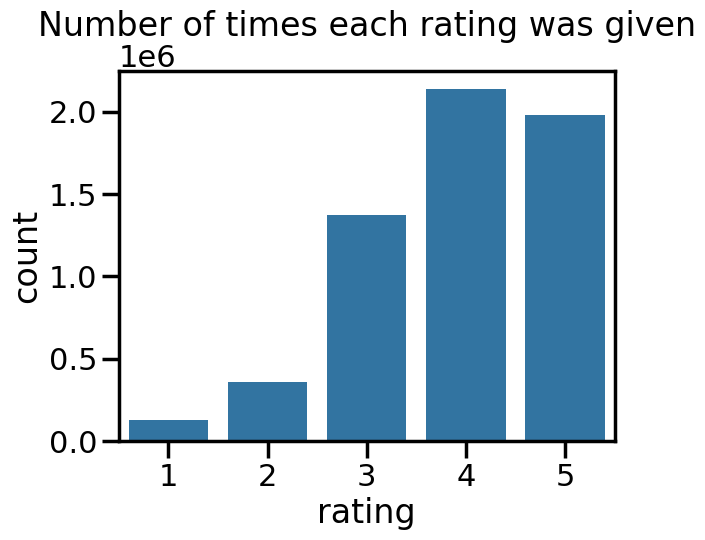

In [53]:
# Visualize the rating column using a bar plot

sns.countplot(x='rating', data=ratings)
plt.title('Number of times each rating was given')

Text(0.5, 1.0, 'Distribution of the average ratings')

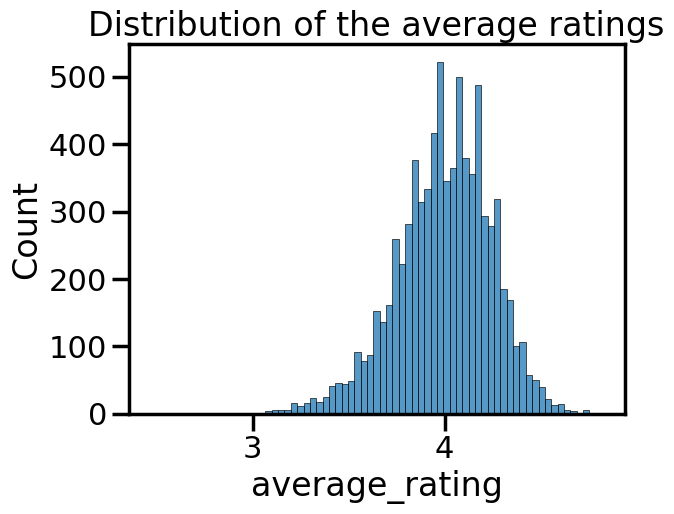

In [54]:
# Visualize the distribution of the average ratings

sns.histplot(x='average_rating', data=books_cleaned)
plt.title('Distribution of the average ratings')

In [55]:
# Find the 25 highest rated of the top most frequently rated books

frequent_books_list = frequent_books['title'].head(50).unique()

frequent_books_ratings = books_cleaned.groupby(['title'])[['average_rating']].agg('mean').reset_index()
frequent_books_ratings = frequent_books_ratings[frequent_books_ratings['title'].isin(frequent_books_list)]
frequent_books_ratings = frequent_books_ratings.sort_values('average_rating', ascending=False)
frequent_books_ratings = frequent_books_ratings.reset_index().drop(['index'], axis=1)
frequent_books_ratings = frequent_books_ratings.head(25)
frequent_books_ratings

,title,average_rating
0,Harry Potter and the Deathly Hallows (Harry Po...,4.61
1,Harry Potter and the Half-Blood Prince (Harry ...,4.54
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.53
3,Harry Potter and the Goblet of Fire (Harry Pot...,4.53
4,Harry Potter and the Order of the Phoenix (Har...,4.46
5,The Help,4.45
6,"A Game of Thrones (A Song of Ice and Fire, #1)",4.45
7,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
8,Harry Potter and the Chamber of Secrets (Harry...,4.37
9,The Book Thief,4.36


In [56]:
# Plot the 25 highest rated of the top most frequently rated books

fig = px.bar(frequent_books_ratings, x='average_rating', y='title', title='25 highest rated of the top most frequently rated books')
fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    width=800,
    height=800
)
fig.show()

### Problem 5: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Goodreads is a social cataloging website that allows people to find and share books. Goodreads users make and read reviews, search for books, create lists of books, create a library catalog, and get book recommendations. Considering Goodreads' purpose is to help its users find enjoyable books to read based on the users' own data and the data of similar users, a good recommendation system is important. The recommendation system ensures that the Goodreads site fulfills its purpose and gives each user unique book recommendations that they will actually enjoy. Goodreads must figure out what type of recommendation system is best for predicting the best recommendations for each user. Using recommendation systems to determine the best model, Goodreads will be able to create unique and accurate algorithms for each user. This would increase customer retention and encourage more people to join Goodreads as accurate recommendations will encourage book readers to use this website to find and share books. 

### Problem 6: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data. Using just the ratings.csv information features, prepare the features and target column for modeling with appropriate encoding and transformations.

Considering all columns of the ratings.csv dataset (the dataset that will be used for modeling) are integers, no encoding is required. Although not all columns in the books.csv dataset are integers, this dataset is only meant for EDA not modeling. Therefore, the books.csv dataset does not require encoding.

In [57]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [58]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

### Problem 7: Train/Test Split

With your data prepared, split it into a train and test set.

In [59]:
# Split data into training and testing sets

train_rate, test_rate = train_test_split(ratings, test_size=0.2, random_state=42)

### Problem 8: A Popularity-Based Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [60]:
# Create a popularity-based model

# Record the start time 
pop_start_time = time.time()

# Calculate item popularity based on training data
book_popularity = train_rate.groupby('book_id')['rating'].count().sort_values(ascending=False)

# Record the end time 
pop_end_time = time.time()
pop_elapsed_time = pop_end_time - pop_start_time
print(f"Baseline training time: {pop_elapsed_time} seconds")

Baseline training time: 0.031873226165771484 seconds


In [61]:
# Baseline model: predict the average rating of the most popular item
most_popular_book = book_popularity.index[0]
baseline_prediction = train_rate[train_rate['book_id'] == most_popular_book]['rating'].mean()

# Make predictions on the test set
test_rate['predicted_rating'] = baseline_prediction

In [62]:
# Evaluate the model using Mean Absolute Error (MAE)

pop_mae = mean_absolute_error(test_rate['rating'], test_rate['predicted_rating'])

print(f"Baseline MAE: {pop_mae}")

Baseline MAE: 0.837623407956057


In [63]:
# Evaluate the model using Mean Squared Error (MSE)

pop_mse = mean_squared_error(test_rate['rating'], test_rate['predicted_rating'])

print(f"Baseline MSE: {pop_mse}")

Baseline MSE: 1.1101021377706313
